<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    kernel = 'linear'

    gs = GridSearchCV(SVC(), {'kernel': ['linear','rbf', 'poly'], 'degree':[2,3], 'C':[0.1,1,10,100,1000,10000]}, cv=10, n_jobs=4)
    gs.fit(x, y)
    
    model = gs.best_estimator_
    print "Trying model {}".format(model)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

In [3]:
gs = GridSearchCV(SVC, {'kernel': ['linear','rbf', 'poly'], 'degree':[2,3], 'C':[0,0.1,1,10,100,1000,10000]})

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [4]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

In [23]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
clf = GridSearchCV(svr, parameters)

In [27]:
clf.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Generating 'Linearly-separated' data set
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.969994
Plotting data set points
Plotting decision region


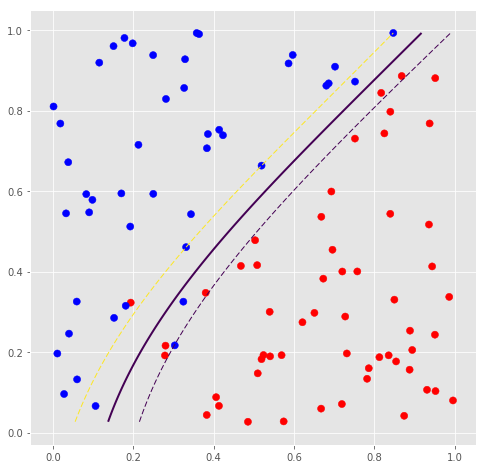

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 1.000000
Plotting data set points
Plotting decision region


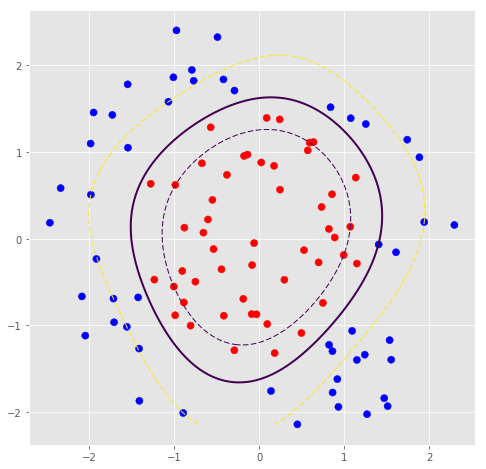

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [10]:
def generate_sin(size=20):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set


/Users/vladislavefimov/my-venv/bin/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [57]:
df = pd.read_csv('data/titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [58]:
df = (df - df.mean(axis=0)) / df.std(axis=0)

In [59]:
df.head()

,x,y
0,-1.679650,-0.428220
1,-1.609665,-0.486883
2,-1.539679,-0.444219
3,-1.469694,-0.414887
4,-1.399708,-0.406888


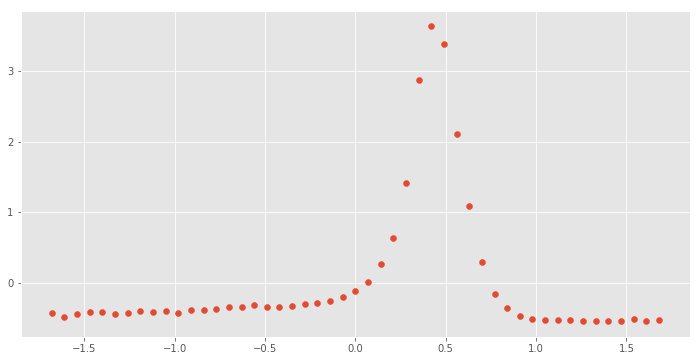

In [60]:
plt.scatter(df.x, df.y)

In [61]:
X = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [62]:
from sklearn.metrics import mean_absolute_error

In [63]:
C = np.logspace(-2, 2, 10)
errors = np.empty((3, len(C)))
params = [{'kernel': 'linear'}, {'kernel': 'poly', 'degree': 3, 'gamma': 6, 'coef0': 1}, {'kernel': 'rbf', 'gamma': 6, 'coef0': 1}]
for g, p in enumerate(params):
    for i, c in enumerate(C):
        model = SVR(C=c, epsilon=0.01, **p)
        model.fit(X, y)
        errors[g, i] = mean_absolute_error(y, model.predict(X))

In [64]:
errors

array([[ 0.47097901,  0.47099204,  0.47099204,  0.47099204,  0.47099204,
         0.47099204,  0.47099204,  0.47099204,  0.47099203,  0.47099201],
       [ 0.41049386,  0.41055274,  0.41055274,  0.41055591,  0.41055058,
         0.41059068,  0.41056891,  0.41053447,  0.41061975,  0.41048173],
       [ 0.41995732,  0.37244021,  0.31237233,  0.24038423,  0.18724699,
         0.1300887 ,  0.10987578,  0.08271354,  0.07079549,  0.05865953]])

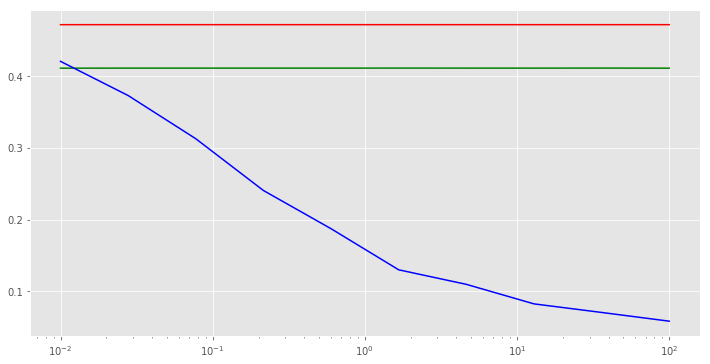

In [65]:
plt.xscale('log')
plt.plot(C, errors[0], 'r')
plt.plot(C, errors[1], 'g')
plt.plot(C, errors[2], 'b')

In [69]:
best = errors.argmin(axis=1)
best

array([0, 9, 9])

In [70]:
model1 = SVR(C=C[best[0]], kernel='linear', epsilon=0.01)

In [71]:
model1.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

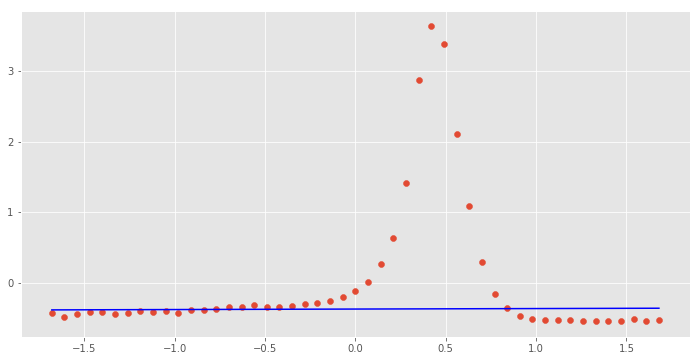

In [72]:
plt.scatter(df.x, df.y)
plt.plot(df.x, model1.predict(X), 'b')

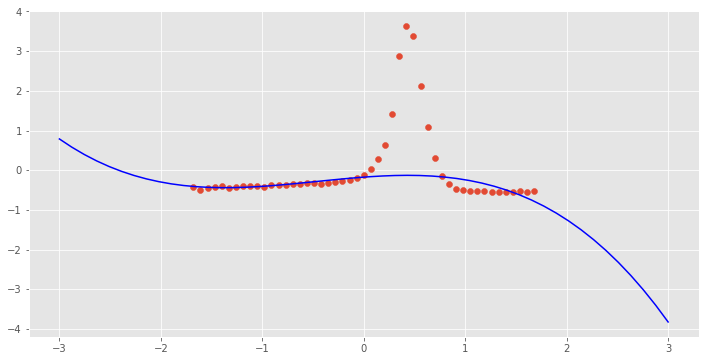

In [80]:
model2 = SVR(C=C[best[1]], kernel='poly', degree=3, gamma=6, coef0=1, epsilon=0.01)
model2.fit(X, y)
plt.scatter(df.x, df.y)
plt.plot(np.linspace(-3,3), model2.predict(np.linspace(-3,3).reshape(-1,1)), 'b')

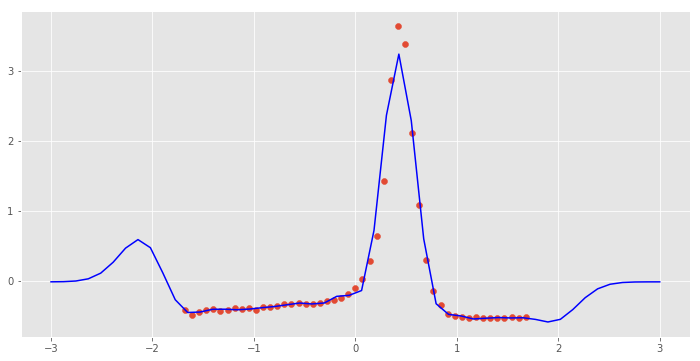

In [78]:
model3 = SVR(C=C[best[2]], kernel='rbf', gamma=6, coef0=1, epsilon=0.01)
model3.fit(X, y)
plt.scatter(df.x, df.y)
plt.plot(np.linspace(-3,3), model3.predict(np.linspace(-3,3).reshape(-1,1)), 'b')

В первых двух случаях наблюдается эффект недообучения, т.к. имеем на тренировочных данных достаточно высокую ошибку. В последнем случае видим эффект переобучения, т.к. в этом случае у нас очень маленькая ошибка на обучении, но из последнего графика видно, что алгоритм сильно подогнался к тренировочным данным и скорее всего на тесте будет иметь большую ошибку. 

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [82]:
!pip install pylev

In [83]:
import pylev

In [174]:
from pylev import levenshtein as lev_dist

In [175]:
lev_dist("hello", "phill")

3

In [196]:
df_en = pd.read_csv("./data/war_and_peace_en.txt", names=['word'])
df_en['label'] = pd.Series(data=np.zeros(len(df_en), dtype=int))
df_es = pd.read_csv("./data/war_and_peace_es.txt", names=['word'])
df_es['label'] = pd.Series(data=np.ones(len(df_es), dtype=int))

df = pd.concat([df_en, df_es])

In [199]:
df.shape

(11403, 2)

In [198]:
# like this
df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [88]:
from sklearn.model_selection import train_test_split

In [86]:
RND_SEED = 1234

In [200]:
df = df.sample(len(df), random_state=RND_SEED)

In [201]:
df = df.reset_index()[df.columns]

In [202]:
df.head()

,word,label
0,continuamente,1
1,bezuchov,1
2,doubt,0
3,exception,0
4,nation,0


In [203]:
df.shape

(11403, 2)

In [204]:
df_train = df[:2000]

In [205]:
df_train.shape

(2000, 2)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(df_train.index.values, df_train.label.values, test_size=0.4, \
                                                    random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [207]:
def string_kernel(U, V):
    gram_matrix = np.zeros((U.shape[0], V.shape[0]))
    for i, x1 in enumerate(U):
        for j, x2 in enumerate(V):
            gram_matrix[i, j] = np.exp(-pylev.levenshtein(df_train.word[x1], df_train.word[x2])**2)
    return gram_matrix

G = string_kernel(X_train, X_train)

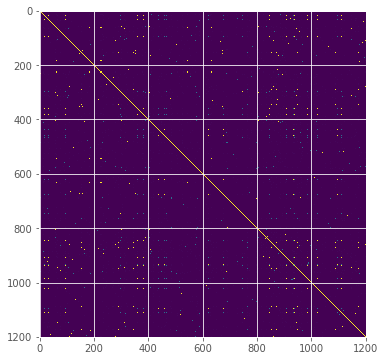

In [208]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [209]:
from sklearn.metrics import accuracy_score

In [210]:
for c in np.logspace(-2., 2, 10):
    svc = SVC(C=c, kernel="precomputed", random_state=RND_SEED)
    svc.fit(G, y_train)
    y_pred_train = svc.predict(G)
    y_pred = svc.predict(string_kernel(X_test, X_train))
    print "Train score: {}, Test score: {}".format(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred))

Train score: 0.565, Test score: 0.5775
Train score: 0.565, Test score: 0.5775
Train score: 0.6275, Test score: 0.64
Train score: 0.7025, Test score: 0.6925
Train score: 0.973333333333, Test score: 0.8025
Train score: 0.989166666667, Test score: 0.82375
Train score: 0.989166666667, Test score: 0.82375
Train score: 0.989166666667, Test score: 0.82375
Train score: 0.989166666667, Test score: 0.82375
Train score: 0.989166666667, Test score: 0.82375


In [211]:
svc = SVC(C=1.0, kernel="precomputed", random_state=RND_SEED)

In [212]:
svc.fit(G, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [213]:
y_pred_train = svc.predict(G)

In [214]:
accuracy_score(y_train, y_pred_train)

0.98833333333333329

In [215]:
y_pred = svc.predict(string_kernel(X_test, X_train))

In [216]:
accuracy_score(y_test, y_pred)

0.82374999999999998